In [64]:
# Importing necessary packages
from urllib.request import Request,urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
from collections import Counter
import math

import random

In [2]:
def html_to_dict(url):
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')

In [3]:
url = "https://www.yelu.sg/lottery/results/history"

In [4]:


req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

In [5]:
soup = BeautifulSoup(webpage, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head><meta charset="utf-8"/><meta content="en" http-equiv="Content-Language"/>
<meta content="initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=0, width=device-width" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>4D Result History, Past Result, 4D Results Past, 4D Checker</title>
<meta content="4D Results Past, 4D Result History, 4D Past Result, Toto Past Results, 4D History, History 4D Result, 4D Checker, Toto 4D Result History, Singapore 4D Past Result" name="description"/><link href="/css/main.min.css?v=541" rel="stylesheet" type="text/css"/>
<link href="https://www.yelu.sg/favs/y-96.png" rel="shortcut icon" sizes="96x96" type="image/png"/><link href="/css/lotto.min.css?v=541" rel="stylesheet" type="text/css"/>
<link href="/manifest/sgmanifest.json" rel="manifest"/>
<link href="/favs/y/icon-192x192.png" rel="apple-touch-icon"/>
<meta content="none" name="msapplication-config"/>
<meta content="#7fc6c8" 

In [6]:
df = pd.read_csv("toto_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           503 non-null    object
 1   First          503 non-null    int64 
 2   Second         503 non-null    int64 
 3   Third          503 non-null    int64 
 4   Fourth         503 non-null    int64 
 5   Fifth          503 non-null    int64 
 6   Sixth          503 non-null    int64 
 7   Bonus          503 non-null    int64 
 8   Winning prize  480 non-null    object
dtypes: int64(7), object(2)
memory usage: 35.5+ KB


In [7]:
# renaming of columns for easier calling later
df.columns = ["date","first","second","third","fourth","fifth","sixth","bonus","winnings"]

In [8]:
# replacing any characters that are not string into nothing
df["winnings"] = df['winnings'].str.replace('\W', '')

# replacing "16Million" into digits
df["winnings"] = df["winnings"].replace(["16Million","16000000"])

# converting the type of "winnings" into float
df["winnings"] = df["winnings"].astype("float")

C:\Users\kelvin.tanwm\AppData\Local\Temp\ipykernel_34384\314413942.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["winnings"] = df['winnings'].str.replace('\W', '')


In [9]:
num_df = df[["first","second","third","fourth","fifth","sixth"]]
prize_df = df["winnings"]

## Analysis of past winning number

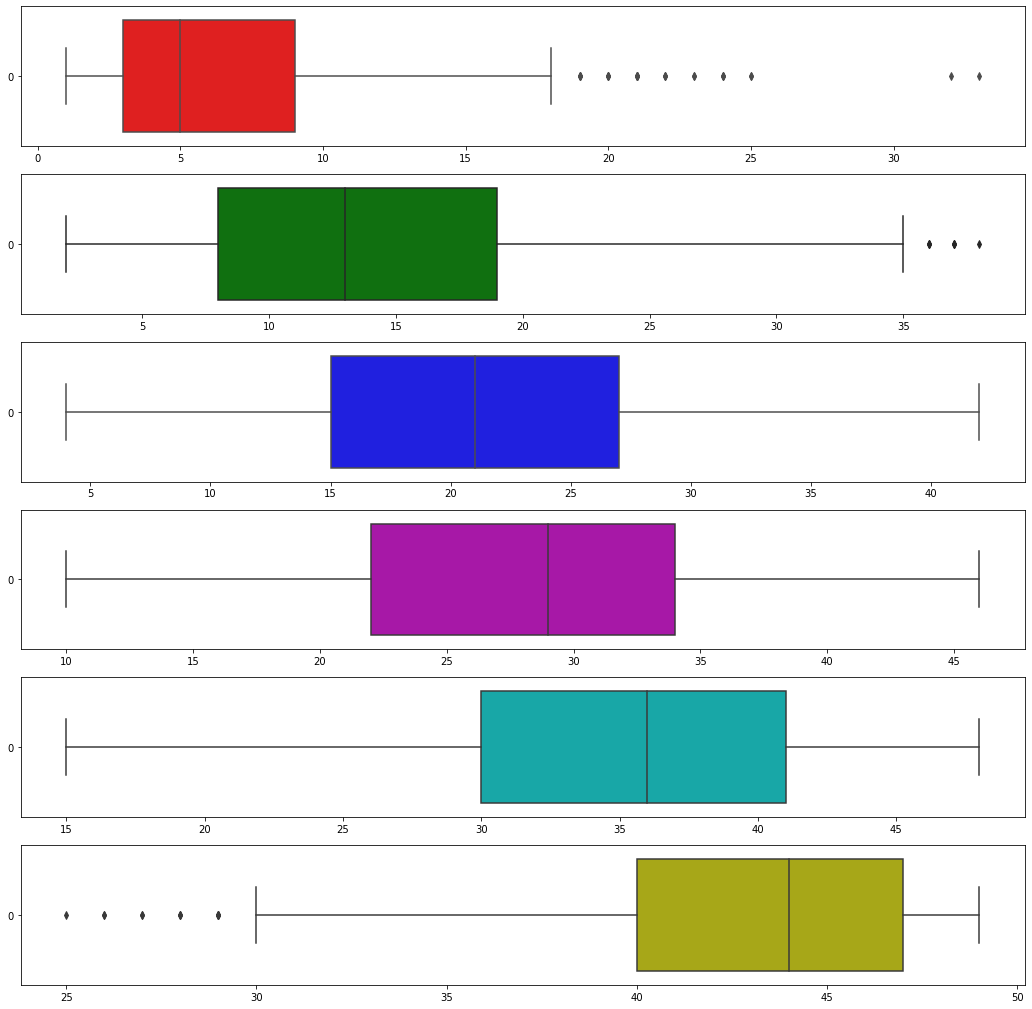

In [10]:
f,axes = plt.subplots(6,1, figsize=(18,18))


colours = ["r", "g", "b", "m", "c", "y"]
count = 0
for var in num_df:
    sns.boxplot(data = num_df[var], orient = "h", ax = axes[count], color = colours[count])
    count +=1

### The first winning number

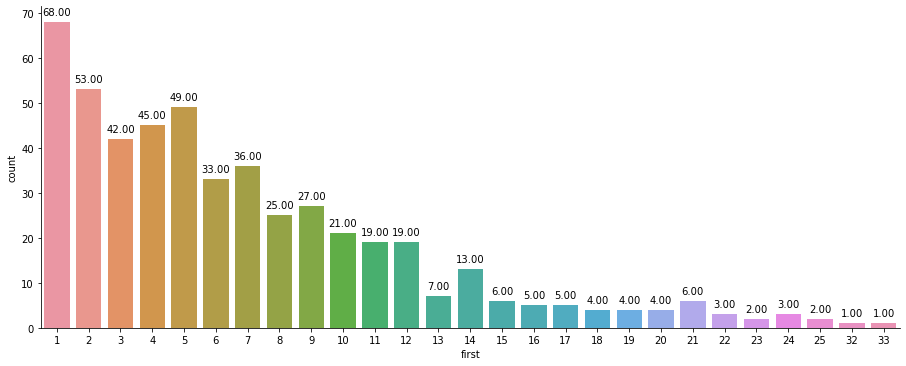

In [11]:
g = sns.catplot(x = "first", data = df , kind = "count",aspect = 2.5)
for ax in g.axes.ravel():
    # obtaining the count of each bar graph
    ls = []
    for p in ax.patches:
        ls.append(p.get_height())
        
     # summing of all the total variables   
#     total = 0
#     for x in ls:
#         total += x
        
    # Plotting the count plot
#     for p in ax.patches:
#         ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
#         p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [51]:
def weights(a,b,c):
    for num in sorted(a):
        if num in c:
            pass
        
        else:
            b[num] = round(a[num]/sum(a.values()),5)

In [15]:
# Creating a new dataframe for the frequency of number in each draw
freq_df = pd.DataFrame(columns = [x for x in range(1,50)])

In [16]:
for num in range(1,50):
    lst= []
    for index, row in num_df.iterrows():
        if num in list(row):
            lst.append(1)
        else:
            lst.append(0)
    freq_df[num] = lst

## Apriori alogrithm

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
test = freq_df.astype("bool")

# building the model
frq_items = apriori(test, min_support = 0.009, use_colnames = True, verbose = 1)
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
frq_items

Processing 76 combinations | Sampling itemset size 4


,support,itemsets,length
0,0.135189,(1),1
1,0.121272,(2),1
2,0.111332,(3),1
3,0.123260,(4),1
4,0.141153,(5),1
...,...,...,...
944,0.009940,"(9, 10, 25)",3
945,0.009940,"(40, 9, 15)",3
946,0.009940,"(35, 12, 13)",3
947,0.009940,"(35, 30, 15)",3


In [19]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [20]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(9, 25)",(10),0.013917,0.123260,0.00994,0.714286,5.794931,0.008225,3.068588
748,"(9, 10)",(25),0.015905,0.109344,0.00994,0.625000,5.715909,0.008201,2.375083
774,"(17, 20)",(16),0.015905,0.123260,0.00994,0.625000,5.070565,0.007980,2.337972
772,"(16, 17)",(20),0.015905,0.133201,0.00994,0.625000,4.692164,0.007822,2.311465
744,"(19, 47)",(8),0.017893,0.109344,0.00994,0.555556,5.080808,0.007984,2.003976
...,...,...,...,...,...,...,...,...,...
770,(30),"(35, 15)",0.145129,0.027833,0.00994,0.068493,2.460861,0.005901,1.043650
771,(15),"(35, 30)",0.155070,0.017893,0.00994,0.064103,3.582621,0.007166,1.049375
757,(40),"(9, 15)",0.155070,0.019881,0.00994,0.064103,3.224359,0.006857,1.047251
741,(15),"(32, 1)",0.155070,0.025845,0.00994,0.064103,2.480276,0.005933,1.040878


In [21]:
import statistics

statistics.median(rules["confidence"])

0.14492753623188406

In [22]:
assoc_dict = {}

# For single digits 
for num in range(1,50):
    for index, row in rules[rules["confidence"]>0.15].iterrows():
            if num in list(row["antecedents"]) and len(list(row["antecedents"])) == 1:
                assoc_dict[f'{num}_{list(row["consequents"])[0]}' ] = row["confidence"]

In [45]:
assoc_dict

{'1_32': 0.19117647058823528,
 '1_39': 0.1764705882352941,
 '1_15': 0.1764705882352941,
 '1_40': 0.1764705882352941,
 '1_41': 0.16176470588235295,
 '1_7': 0.16176470588235295,
 '2_15': 0.2295081967213115,
 '2_29': 0.1639344262295082,
 '2_35': 0.1639344262295082,
 '3_39': 0.19642857142857142,
 '3_38': 0.17857142857142858,
 '3_9': 0.17857142857142858,
 '3_36': 0.17857142857142858,
 '3_19': 0.1607142857142857,
 '3_40': 0.1607142857142857,
 '4_47': 0.2096774193548387,
 '4_35': 0.1774193548387097,
 '4_15': 0.1774193548387097,
 '4_31': 0.16129032258064516,
 '4_5': 0.16129032258064516,
 '4_44': 0.16129032258064516,
 '4_12': 0.16129032258064516,
 '4_40': 0.16129032258064516,
 '5_27': 0.2112676056338028,
 '5_12': 0.1971830985915493,
 '5_30': 0.18309859154929578,
 '5_16': 0.16901408450704225,
 '6_26': 0.20689655172413793,
 '6_40': 0.18965517241379312,
 '6_16': 0.1724137931034483,
 '6_45': 0.15517241379310345,
 '6_47': 0.15517241379310345,
 '7_48': 0.19696969696969696,
 '7_18': 0.1666666666666666

In [104]:
result = []

c1 = Counter(num_df["first"])
# Creating a dictionary to assign the weights of the numbers in the first pick to the number
c1_weights = {}
c2 = Counter(num_df["second"])
c2_weights= {}
c3 = Counter(num_df["third"])
c3_weights= {}
c4 = Counter(num_df["fourth"])
c4_weights= {}
c5 = Counter(num_df["fifth"])
c5_weights= {}
c6 = Counter(num_df["sixth"])
c6_weights= {}

In [105]:
weights(c1,c1_weights,result)

# Choosing the random weighted first pick
output_1 = random.choices(list(c1_weights.keys()),weights = list(c1_weights.values()),k =1)

result.append(output_1[0])

In [106]:
for num in sorted(c2):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c2[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c2[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c2,c2_weights,result)

output_2 = random.choices(list(c2_weights.keys()),weights = list(c2_weights.values()),k =1)
result.append(output_2[0])

In [107]:
for num in sorted(c3):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c3[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c3[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c3,c3_weights,result)

output_3 = random.choices(list(c3_weights.keys()),weights = list(c3_weights.values()),k =1)
result.append(output_3[0])                

In [108]:
for num in sorted(c4):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c4[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c4[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c4,c4_weights,result)

output_4 = random.choices(list(c4_weights.keys()),weights = list(c4_weights.values()),k =1)
result.append(output_4[0])   

In [109]:
for num in sorted(c5):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c5[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c5[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c5,c5_weights,result)

output_5 = random.choices(list(c5_weights.keys()),weights = list(c5_weights.values()),k =1)
result.append(output_5[0])  

In [110]:
for num in sorted(c6):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c6[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c6[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c6,c6_weights,result)

output_6 = random.choices(list(c6_weights.keys()),weights = list(c6_weights.values()),k =1)
result.append(output_6[0])  

In [112]:
sorted(result)

[6, 7, 18, 27, 45, 47]

In [138]:
result = []

c1 = Counter(num_df["first"])
# Creating a dictionary to assign the weights of the numbers in the first pick to the number
c1_weights = {}
c2 = Counter(num_df["second"])
c2_weights= {}
c3 = Counter(num_df["third"])
c3_weights= {}
c4 = Counter(num_df["fourth"])
c4_weights= {}
c5 = Counter(num_df["fifth"])
c5_weights= {}
c6 = Counter(num_df["sixth"])
c6_weights= {}

weights(c1,c1_weights,result)

# Choosing the random weighted first pick
output_1 = random.choices(list(c1_weights.keys()),weights = list(c1_weights.values()),k =1)

result.append(output_1[0])

for num in sorted(c2):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c2[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c2[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c2,c2_weights,result)

output_2 = random.choices(list(c2_weights.keys()),weights = list(c2_weights.values()),k =1)
result.append(output_2[0])

for num in sorted(c3):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c3[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c3[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c3,c3_weights,result)

output_3 = random.choices(list(c3_weights.keys()),weights = list(c3_weights.values()),k =1)
result.append(output_3[0])                

for num in sorted(c4):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c4[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c4[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c4,c4_weights,result)

output_4 = random.choices(list(c4_weights.keys()),weights = list(c4_weights.values()),k =1)
result.append(output_4[0])   

for num in sorted(c5):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c5[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c5[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c5,c5_weights,result)

output_5 = random.choices(list(c5_weights.keys()),weights = list(c5_weights.values()),k =1)
result.append(output_5[0])  

for num in sorted(c6):
    if num in result:
        reObj = re.compile(str(num))

        for key in assoc_dict.keys():
            if(reObj.match(key)):
                c6[int(re.findall(r"(\d*$)",key)[0])] = math.ceil(c6[int(re.findall(r"(\d*$)",key)[0])] * 
                (1+assoc_dict[key]))
                
weights(c6,c6_weights,result)

output_6 = random.choices(list(c6_weights.keys()),weights = list(c6_weights.values()),k =1)
result.append(output_6[0])  

sorted(result)

[8, 10, 15, 31, 38, 49]